In [138]:
import cv2

In [140]:
img=cv2.imread('first.jpg')

In [160]:
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [154]:
img.shape

(683, 1023, 3)

In [155]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [156]:
cv2.imshow('webcam',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [157]:
gray.shape

(683, 1023)

In [158]:
type(gray[0][0])

numpy.uint8

In [159]:
hs= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('window 1',hs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [161]:
hs.shape

(683, 1023, 3)

In [162]:
vid = cv2.VideoCapture('video.mp4')
while True:
    try:
        _,frame= vid.read()
        cv2.imshow('window2',frame)
    except :
        pass
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

In [163]:
img[0]

array([[237, 234, 230],
       [238, 235, 231],
       [236, 234, 233],
       ...,
       [109, 108, 112],
       [108, 107, 111],
       [108, 107, 111]], dtype=uint8)

# Lect 2

Edge Detection

In [164]:
import cv2

In [165]:
img= cv2.imread('photo.jpg')

In [168]:
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
reImg = cv2.resize(img,(700,500))

In [45]:
cv2.imshow('webcam',reImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [167]:
gray= cv2.cvtColor(reImg,cv2.COLOR_BGR2GRAY)

In [169]:
canny_img=cv2.Canny(gray,80,80)
cv2.imshow('webcam',canny_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [170]:
import numpy as np

In [180]:
kernel= np.ones((1,2),np.uint8)

In [177]:
kernel

array([[1, 1, 1]], dtype=uint8)

In [178]:
erodeImg = cv2.erode(canny_img,kernel,iterations=1)
cv2.imshow('webcam',erodeImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [181]:
dilateImg = cv2.dilate(erodeImg,kernel,iterations=1)
cv2.imshow('webcam',dilateImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

Drawing Shapes and Texts on Image

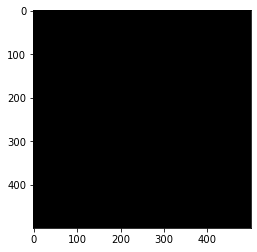

In [197]:
blank= np.zeros((500,500,3),dtype='uint8')
from matplotlib import pyplot as plt
plt.imshow(blank)

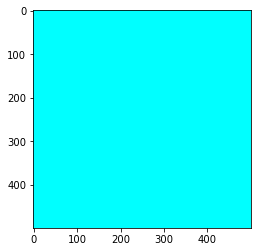

In [185]:
blank[:]=[0,255,255]
plt.imshow(blank)

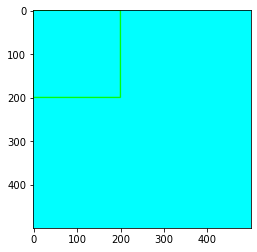

In [117]:
rec = cv2.rectangle(blank,(0,0),(200,200),(0,255,0),2)
plt.imshow(blank)

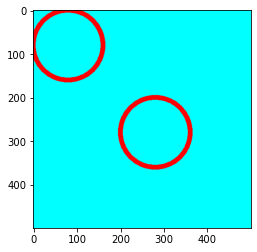

In [121]:
ci = cv2.circle(blank,(280,280),80,(255,0,0),10)
plt.imshow(blank)

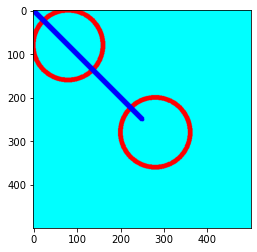

In [122]:
line = cv2.line(blank,(0,0),(250,250),(0,0,255),10)
plt.imshow(blank)

In [125]:
text= cv2.putText(blank,"Pepcoder",(200,400),cv2.FONT_HERSHEY_TRIPLEX,2,(255,255,0),4)

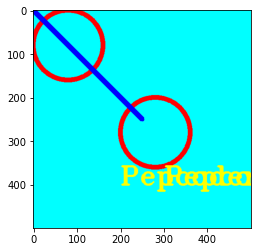

In [127]:
plt.imshow(blank)

# Color Detection

In [203]:
web =cv2.VideoCapture(0)
while(1) :
    _, img = web.read()
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    red_L = np.array([135,85,110],np.uint8)
    red_U = np.array([185,250,250],np.uint8)
    redM = cv2.inRange(hsv,red_L,red_U)
    kernel = np.ones((5,5),'uint8')
    redM = cv2.dilate(redM,kernel)
    conts, hier = cv2.findContours(redM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cont in conts :
        area = cv2.contourArea(cont)
        if(area>500) :
            x,y,w,h = cv2.boundingRect(cont);
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(img,"RED COLOR",(x,y), cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,255))
    cv2.imshow("Red Color Detection ",img)
    if cv2.waitKey(1)==ord('q'):
        break;

cv2.destroyAllWindows()      

In [207]:
web.release()

In [206]:
web =cv2.VideoCapture(0)
while(1) :
    _, img = web.read()
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    red_L = np.array([252, 98, 3],np.uint8)
    red_U = np.array([252, 3, 3],np.uint8)
    redM = cv2.inRange(hsv,red_L,red_U)
    kernel = np.ones((5,5),'uint8')
    redM = cv2.dilate(redM,kernel)
    conts, hier = cv2.findContours(redM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cont in conts :
        area = cv2.contourArea(cont)
        if(area>500) :
            x,y,w,h = cv2.boundingRect(cont);
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(img,"RED COLOR",(x,y), cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,255))
    cv2.imshow("Red Color Detection ",img)
    if cv2.waitKey(1)==ord('q'):
        break;

cv2.destroyAllWindows()     

# Mediapipe

In [1]:
!pip install mediapipe

In [2]:
import mediapipe as mp
import cv2
import numpy as np

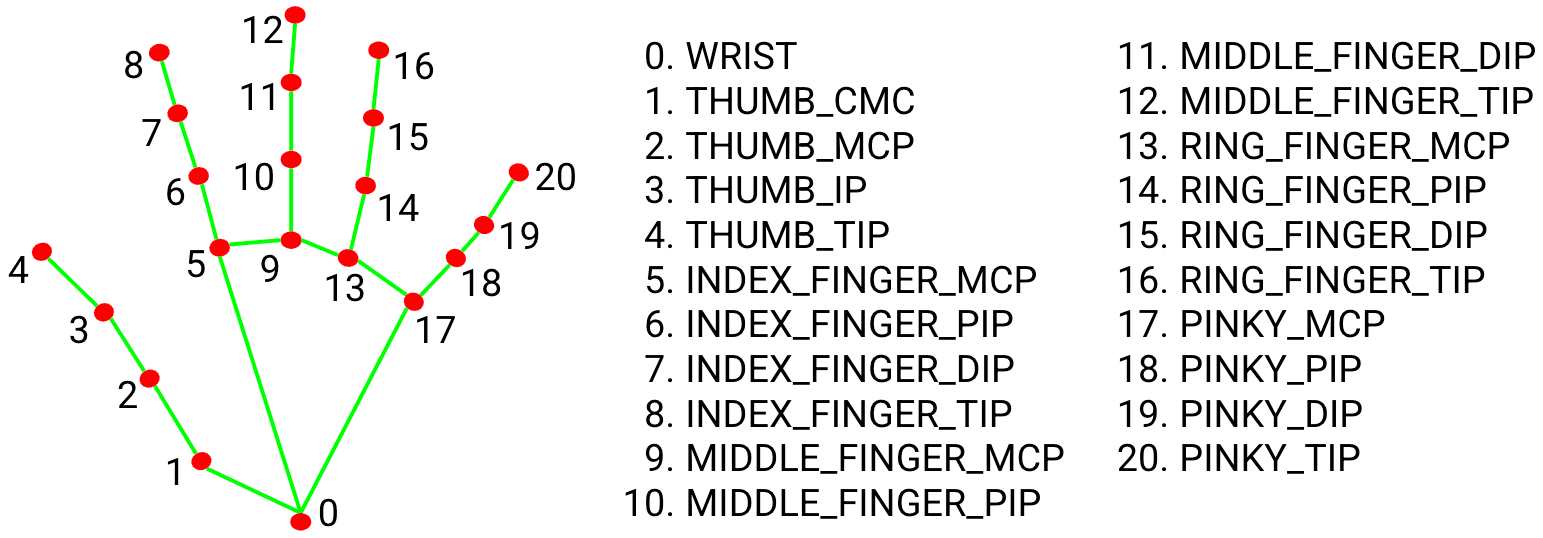

In [3]:
!py -m pip install mediapipe

In [ ]:
mp_face_detection = mp.solutions.face_detection
drawing_details = mp.solutions.drawing_utils

with mp_face_detection.FaceDetection(model_selection=1,min_detection_confidence=0.5) as face_detection:
    
    img = cv2.imread("first.jpg")
    result = face_detection.process(img)
    for detect in result.detections:
          drawing_details.draw_detection(img,detect)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()        
